In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Evaluation Plots**

In [8]:
res = "ResNet-50"
model = "ResNet-101"
# model = "Swin-T"
model = "SegNet"

# Alivia's Paths
# evaluation_metrics_path = f"/content/drive/MyDrive/Final Year Project/8th Sem/Loss Plots/Results/{model}/Evaluation.txt"

# Dibyarup's Paths
res50_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/ResNet-50/Evaluation.txt"
res101_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/ResNet-101/Evaluation.txt"
swint_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/Swin-T/Evaluation.txt"
segnet_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Results/SegNet/Evaluation.txt"

In [9]:
pd.set_option('display.float_format', '{:.14f}'.format)

res50_metrics = pd.read_csv(res50_path, delimiter=": ", names=["Evaluation_Metric","Value"])
res101_metrics = pd.read_csv(res101_path, delimiter=": ", names=["Evaluation_Metric","Value"])
# swint_metrics = pd.read_csv(swint_path, delimiter=": ", names=["Evaluation_Metric","Value"])
segnet_metrics = pd.read_csv(segnet_path, delimiter=": ", names=["Evaluation_Metric","Value"])

<ipython-input-9-f8ec83e1c304>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  res50_metrics = pd.read_csv(res50_path, delimiter=": ", names=["Evaluation_Metric","Value"])
<ipython-input-9-f8ec83e1c304>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  res101_metrics = pd.read_csv(res101_path, delimiter=": ", names=["Evaluation_Metric","Value"])
<ipython-input-9-f8ec83e1c304>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine

In [14]:
# Extract values into lists
res50_values = res50_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
res101_values = res101_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
# swint_metrics = swint_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
segnet_values = segnet_metrics.set_index('Evaluation_Metric')['Value'].to_dict()

# Create the new dataframe
evaluation_metrics = pd.DataFrame({
    # 'Model': ['ResNet-50', 'ResNet-101', 'Swin-T', 'SegNet'],
    'Model': ['ResNet-50', 'ResNet-101', 'SegNet'],
    'Time Taken': [res50_values['Time taken'], res101_values['Time taken'], segnet_values['Time taken']],
    'MSE': [res50_values['MSE'], res101_values['MSE'], segnet_values['MSE']],
    'SSIM': [res50_values['SSIM'], res101_values['SSIM'], segnet_values['SSIM']],
    'Accuracy': [res50_values['Accuracy'], res101_values['Accuracy'], segnet_values['Accuracy']],
    'Recall': [res50_values['Recall'], res101_values['Recall'], segnet_values['Recall']],
    'Precision': [res50_values['Precision'], res101_values['Precision'], segnet_values['Precision']],
    'F1 Score': [res50_values['F1 Score'], res101_values['F1 Score'], segnet_values['F1 Score']]
})

evaluation_metrics

        Model       Time Taken              MSE             SSIM  \
0   ResNet-50 0.01804933578837 0.02621390856802 0.45896074175835   
1  ResNet-101 0.02754566314537 0.02484901249409 0.42245692014694   
2      SegNet 0.00663023666271 0.02783468551934 0.33640849590302   

          Accuracy           Recall        Precision         F1 Score  
0 0.97378611564636 0.45138573550542 0.48842012341834 0.46917318314795  
1 0.97515100240707 0.40426841939152 0.52045578399750 0.45506284713992  
2 0.97216492891312 0.27105189697466 0.43729954369799 0.33466679765512  


<Figure size 1680x1000 with 0 Axes>

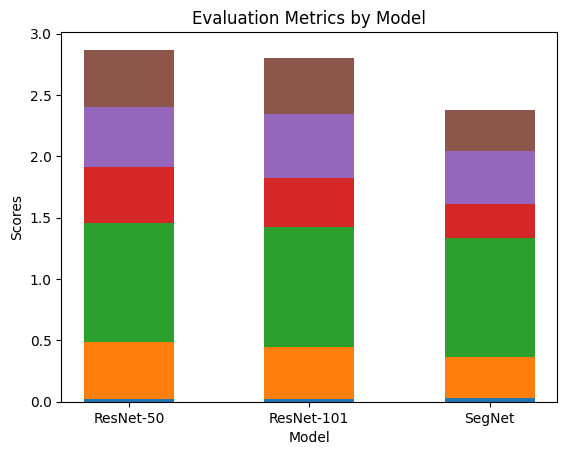

In [19]:
# Plotting
plt.figure(figsize=(16.8, 10.0))
# plt.plot(evaluation_metrics['Epoch_No'], df_train['Loss'], color='blue', label='Training Loss')

# # Scaling
# plt.xticks(range(0, 301, 5), rotation=90)
# plt.ylim(0, 1.1, 0.000000001)

# # Adding Title and Labels
# # plt.title(f"Loss Curve for RoadSegNN ({model} Backbone)", color='purple', fontsize=18) # RoadSegNN
# plt.title(f"Loss Curve for {model}", color='purple', fontsize=18) # SegNet
# plt.xlabel('Epoch Number', fontsize=14)
# plt.ylabel('Loss', fontsize=14)
# plt.legend(fontsize='large')
# plt.show()


# Plotting the stacked bar graph
fig, ax = plt.subplots()

# Define the positions for the bars on the x-axis
bar_width = 0.5
index = evaluation_metrics['Model']

# Stacking the bars
ax.bar(index, evaluation_metrics['MSE'], bar_width, label='MSE')
ax.bar(index, evaluation_metrics['SSIM'], bar_width, bottom=evaluation_metrics['MSE'], label='SSIM')
ax.bar(index, evaluation_metrics['Accuracy'], bar_width,bottom=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'], label='Accuracy')
ax.bar(index, evaluation_metrics['Recall'], bar_width,bottom=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'], label='Recall')
ax.bar(index, evaluation_metrics['Precision'], bar_width,bottom=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'] + evaluation_metrics['Recall'], label='Recall')
ax.bar(index, evaluation_metrics['F1 Score'], bar_width,bottom=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'] + evaluation_metrics['Recall'] + evaluation_metrics['Precision'], label='F1 Score')



# Adding labels and title
ax.set_title('Evaluation Metrics by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')

# plt.legend(fontsize='large')
plt.show()